# Data Science 2 Math 4366
# Spring 2021 Tarleton State University
# Masters in Mathematics
# Dr. Scott Cook
# Homework 1

Below is the final* version of my code for the English Boarding School SIR model in $\S 6.2.1$ p.126-130 of An Introduction to Mathematical Epidemiology.

Recall, the goal is to convert the single point estimate approach to a Bayesian framework using PyMC3.  In this way, we estimate our model parameters and prediction in a way that reflects our level (or lack) of confidence based on our limited data.

This took me a long time because I explored many options for how much noise to inject, whether to normalize to proportions,  where to set eps, how to handle missing day 2 data, etc.  To spare you that time, we'll declare:
- noise - Too much noise → predictions are noisy; too little → long run times and vulnerable to divergences.  In the end, 0.02 gave me the best balance of model accuracy and run time.  So, use noise=0.02.
- eps = 0.2 - I don't have a good justification, but let's stick with it unless you find a good reason to change.
- for this hwk, there is no equivalent of missing day 2 data
- for pm.sample
    - draws = 4*tune
    - tune = 500 (unless this takes a really long time - let me know if so)
    - other settings as above unless you find a good reason to chagne something.  In that case, *please* let me know because I'm still learning about PyMC too.
    - I think you should convert a Kaggle kernel to a Google AI notebook.  When writing & debugging code, use a small cheap instance like E2 1vCPU. But, when you're ready for a big run, I've had good luck with the "compute optimized 4vCPU".  Yes, its more expense at \$0.20/hr, but the free 300 does go a long way at that rate.

Your assignment: give the same treatment to the example in $\S 6.2.2$ p.130-133 of HIV/AIDS prevalence.
- Due to the way HIV progresses, the infected $I$ class is modeled with 4 subclasses where $I = I_1 + I_2 + I_3 + I_4$.
    - ODE model recognizes all 4 subclasses
    - Observed data combines them as a single $I$ class.
    - This is an example of a hierarchial model with interal variables that influence the system, but are not directly observed.
- Recall that PyMC3 tends to do better on "normalized" proportional data than on "raw" counts.  However, the textbook presents the model and its point estimates as raw counts.  Thus, we define new variables $\bar{S} = \frac{S}{N}$, $\bar{I} = \frac{I}{N}$, $\bar{I_1} = \frac{I_1}{N}$, ..., $\bar{I_4} = \frac{I_4}{N}$.
    - Note that $\lambda$ is already expressed more naturally in these variables $\lambda=\beta e^{-\alpha \bar{I}} \bar{I}$
    - In class, we showed how to convert the ODE into barred variables, which in some cases changed the parameter (ex: for SIR, $\bar{\beta} = \beta N$.  I *think* that the only parameter changes here is $\bar{\Lambda} = \frac{\Lambda}{N}$; otherwise all barred parameters equal their unbarred counterparts.  However, I would appreciate someone checking my work.
- Being experts in this domain, the authors made choices to fix $\Lambda$ and $\mu$.  Follow their lead.
- To generate random numbers, use np.random.default_rng(seed) so that we all get results that are as similar as possible.
1. Your job - fit $\alpha$, $\beta$, and $\gamma$ using a Bayesian approach.  Generate and plot posterior distributions that are compatible with the book's point estimates.
    - As with the code above, you may "cheat" by using the book's point estimates for $\alpha$, $\beta$, and $\gamma$ in Table 6.3 to generate $y$ from the ODE.  You may also use them to set loc for your priors with some random error via "val * np.random.default_rng(seed).uniform(1-eps, 1+eps)".  After all, if we start Bayes at the correct answer, it's not very impressive if he finds the correct answer.
2. Using sample_posterior_predictive, create plots like those above.
3. In what proportion of posterior predictive samples does the $I$ class *ever* exceed 2\% between 1990 and 2011.
3. In what proportion of posterior predictive samples does the $I$ class go to 0 (HIV eradicated)?
4. Is there a way to extrapolate out to later years?  As I write this, I am not sure.  But if there is, I'd like to know if/when the $I$ class starts decreasing.



For noise=0.01 ... using idata from /home/jupyter/idata/bayes noise=1.netcdf


,draws,min,25%,50%,TRUE,mean,75%,max,prior_loc
sigma,8000,0.004647,0.009098,0.132464,1.00000,0.247764,0.468935,1.216447,1.109582
beta,8000,1.800184,1.812821,1.814902,1.80831,1.814881,1.816926,1.829840,2.006469
alpha,8000,0.461000,0.467061,0.467962,0.46500,0.467950,0.468877,0.474532,0.515956


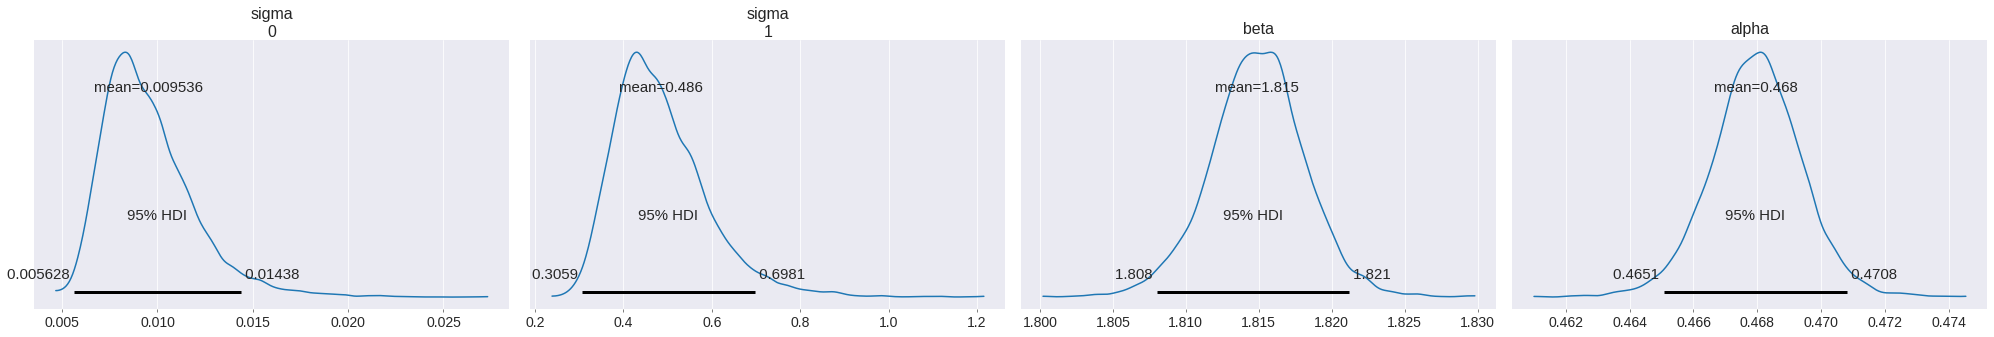

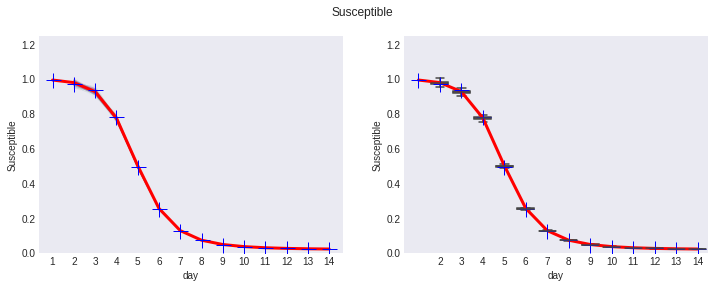

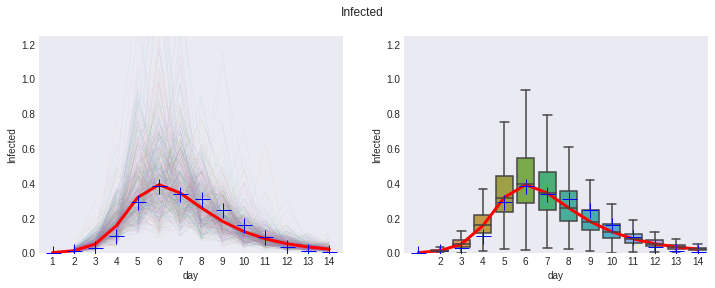



For noise=0.02 ... using idata from /home/jupyter/idata/bayes noise=2.netcdf


,draws,min,25%,50%,TRUE,mean,75%,max,prior_loc
sigma,8000,0.009838,0.018272,0.157375,1.00000,0.249459,0.463576,1.229480,1.109582
beta,8000,1.789451,1.817716,1.821918,1.80831,1.821936,1.826090,1.858830,2.006469
alpha,8000,0.458604,0.469280,0.471073,0.46500,0.471127,0.472943,0.488595,0.515956


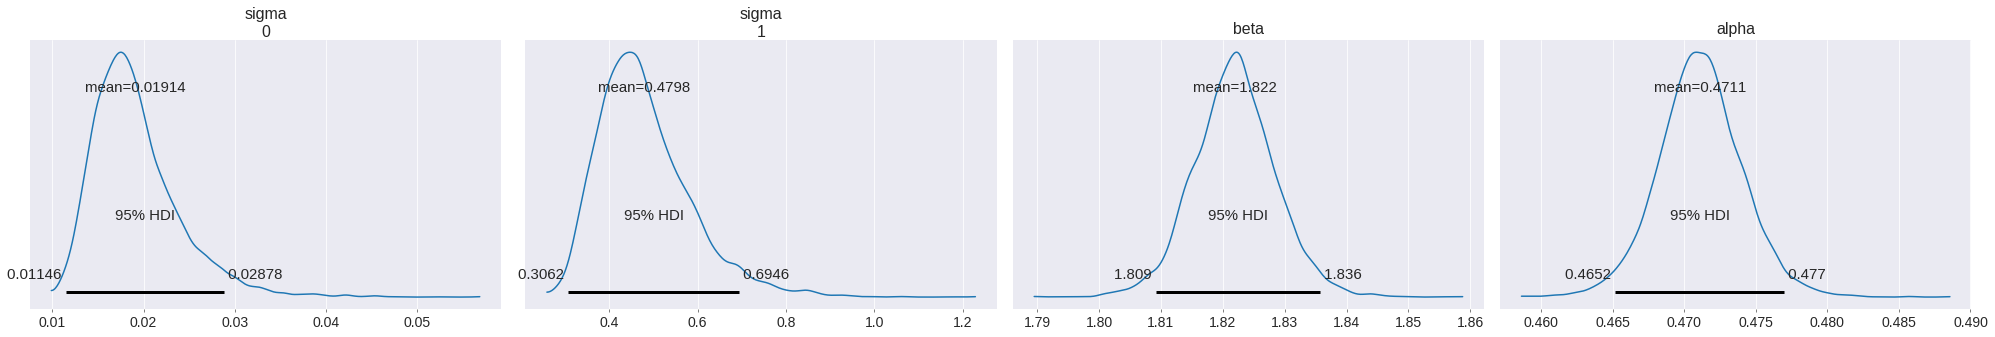

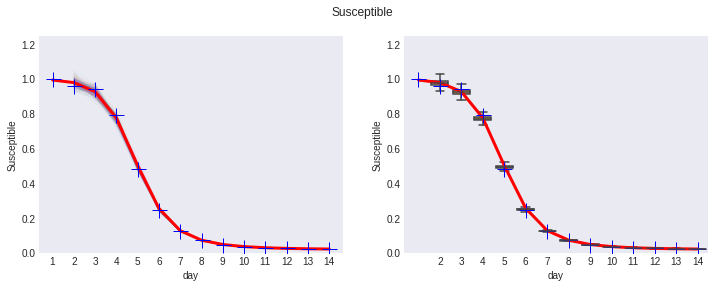

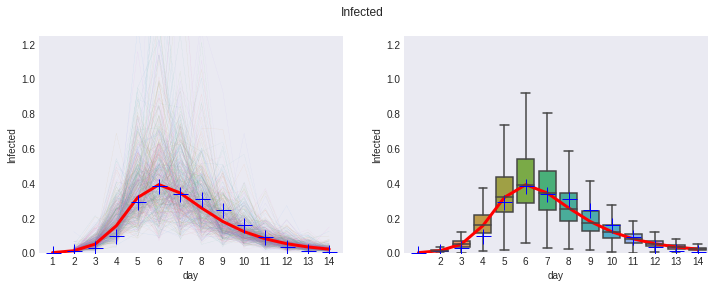



For noise=0.05 ... using idata from /home/jupyter/idata/bayes noise=5.netcdf


,draws,min,25%,50%,TRUE,mean,75%,max,prior_loc
sigma,8000,0.023141,0.045337,0.209618,1.00000,0.255284,0.446245,1.300034,1.109582
beta,8000,1.759437,1.833684,1.844176,1.80831,1.844580,1.855221,1.932090,2.006469
alpha,8000,0.447643,0.476655,0.481112,0.46500,0.481410,0.486104,0.514179,0.515956


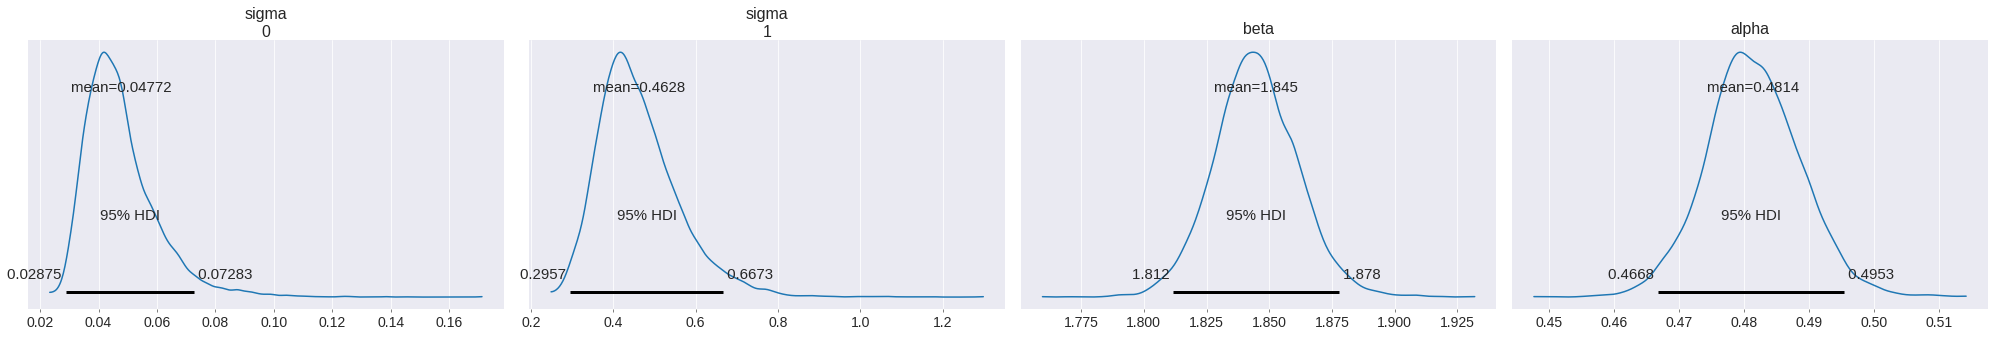

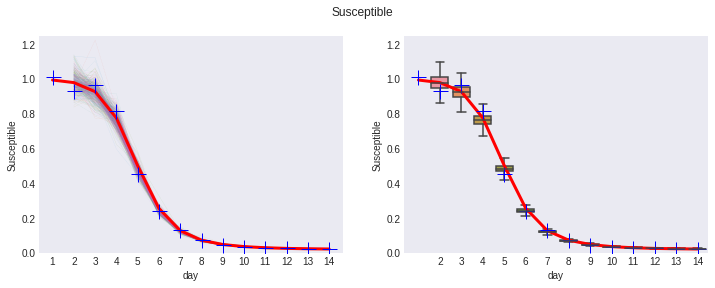

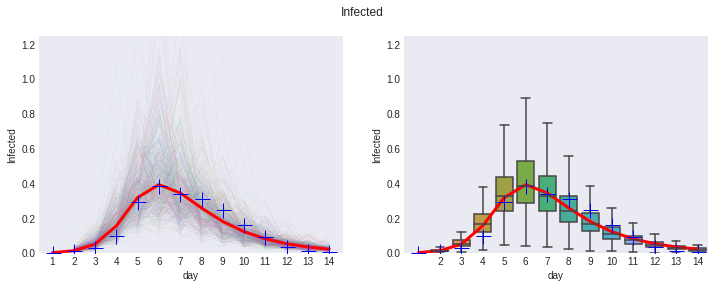



For noise=0.1 ... using idata from /home/jupyter/idata/bayes noise=10.netcdf


,draws,min,25%,50%,TRUE,mean,75%,max,prior_loc
sigma,8000,0.046687,0.089714,0.236027,1.00000,0.271625,0.434881,1.153740,1.109582
beta,8000,1.719357,1.860026,1.879076,1.80831,1.879002,1.897274,2.006074,2.006469
alpha,8000,0.435549,0.488922,0.497269,0.46500,0.497229,0.505253,0.549487,0.515956


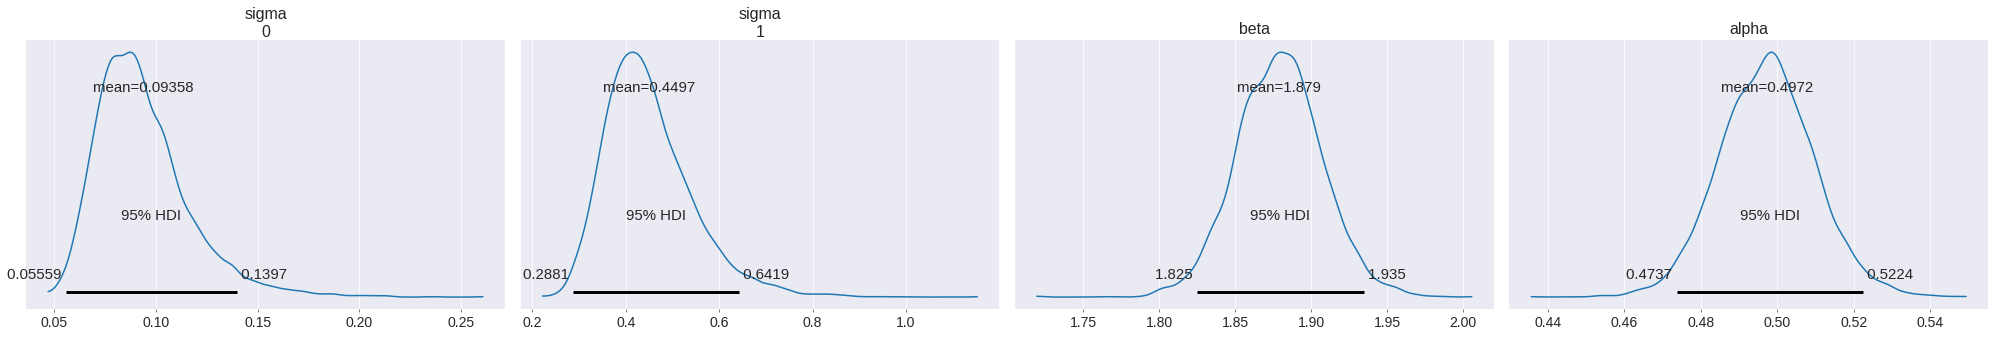

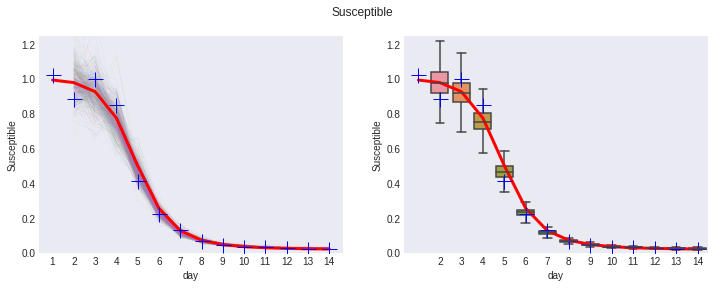

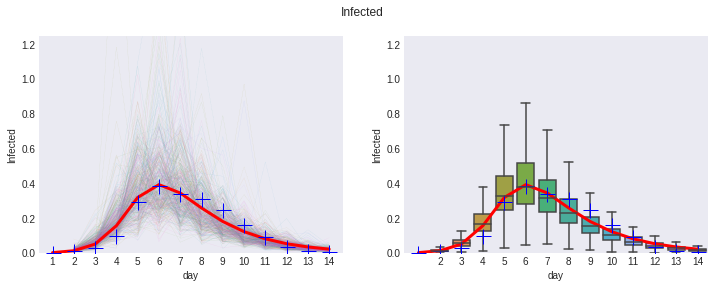

CPU times: user 46.5 s, sys: 1.23 s, total: 47.8 s
Wall time: 50.7 s


In [13]:
# Code for the English Boarding School SIR model

import pathlib, numpy as np, scipy as sp, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, pymc3 as pm, arviz as az
plt.style.use("seaborn-darkgrid")
np.seterr(divide='ignore')

tune  = 500   # number of tuning steps before we start keeping good data
cores = 4     # kaggle kernels have 4 cores, so we can use each one to run chains in parallel
eps   = 0.2   # we want prior distributions centered near, but not right at, the true value.  eps pushes the prior away from true
seed  = 42
refresh = False  
# refresh = True  # Delete & recreate any existing data

# p.126
y0 = [760, 3]
times = np.arange(1, 15)
t0 = times[0]
# p.129
theta = {'beta' : 0.00237, 'alpha': 0.465}
n_states = len(y0)
n_theta = len(theta)

def SIR(y, t, p):
    ds = -p[0] * y[0] * y[1]
    di = p[0] * y[0] * y[1] - p[1] * y[1]
    return [ds, di]

# Run ODE
y = sp.integrate.odeint(SIR, y0, times, (list(theta.values()),), rtol=1e-8)  # get ODE predictions

# normalize y and adjust parameters accordingly
n = y[0].sum()
y = y.T / n
obs = y.copy()
# Replace I class with observations in Table 6.1 p.126
obs[1,2:] = np.array([25,75,227,296,258,236,192,126,71,28,11,7]) / n

# alpha does not change, but beta must be multiplied by n
theta_n = theta.copy()
theta_n['beta'] *= n
theta_n['sigma'] = 1.0
# guess loc for priors, but inject some error so Bayes doesn't get to start at the correct answer
theta_loc = {key: val * np.random.default_rng(seed).uniform(1-eps, 1+eps) for key,val in theta_n.items()}

# create pymc3 ODE object
sir_model = pm.ode.DifferentialEquation(
    func=SIR,
    times=times[1:],
    t0=times[0],
    n_states=n_states,
    n_theta=n_theta)

def inject_noise(noise, seed):
    """Add noise to S class predictions from odeint"""
    z = obs.copy()
    z[0] = np.random.default_rng(seed).lognormal(mean=np.log(z[0]), sigma=noise)
    return z

def plot_data(z):
    plt.plot(times, y[0], 'r', label='S')  # ODE prediction
    plt.plot(times, y[1], 'b', label='I')  # ODE prediction
    plt.plot(times, z[0], 'r+', ms=15)     # observations with injected noise
    plt.plot(times, z[1], 'b+', ms=15)     # observations with injected noise
    plt.legend()
    plt.show()

def make_model(z):
    """Creates the pymc3 model object, but does not run it"""
    with pm.Model() as model:
        # Choose priors on alpha, beta, and sigma
        theta_prior = [pm.Lognormal(key, pm.math.log(theta_loc[key]), 1.0) for key in ['beta', 'alpha']]
        sigma_prior = pm.HalfCauchy("sigma", theta_loc['sigma'], shape=n_states)
        # Create pymc3 ODE model and top-level variable Z=[S,I]
        sir_curves_n = sir_model(y0=obs.T[0], theta=theta_prior)
        Z = pm.Lognormal("Z", mu=pm.math.log(sir_curves_n), sigma=sigma_prior, observed=z.T[1:])
    return model

def analyze(idata):
    """Analyzes results of pymc3 run"""
    # Compute stats on parameters posterior distributions
    theta_stats = idata.posterior.to_dataframe().describe().T  # 7-number summaries
    theta_stats['draws'] = idata.posterior.beta.size  # count
    theta_stats['TRUE'] = pd.Series(theta_n)          # true value from p.126
    theta_stats['prior_loc'] = pd.Series(theta_loc)   # start value for bayes
    theta_stats = theta_stats[['draws', 'min', '25%', '50%', 'TRUE', 'mean', '75%', 'max', 'prior_loc']]  # rearrange columns
    display(theta_stats)
    az.plot_posterior(idata, round_to=4, hdi_prob=0.95)  # plot posteriors
    plt.show()
    
    # plot posterior predictive data (aka - draw parameters from their posterior and run ODE with them)
    pred = idata.posterior_predictive.to_dataframe().reset_index()
    pred.rename(columns={'Z_dim_0':'day', 'Z_dim_1':'class'}, inplace=True)  # restoring column names
    pred['day'] += 2  # predictions start on day 2
    for i, c in enumerate(['Susceptible', 'Infected']):  # make separate plots for S & I
        mask = pred['class'] == i
        df = pred[mask].pivot(['chain','draw'], 'day', 'Z').reset_index(drop=True)  # extract this class and reshape data for plotting
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # make 2 side-by-side plots
        fig.suptitle(c)  # fig title
        xticks = np.arange(1,15)  # x-axis tick mark labels

        ax = axes[0]
        sns.lineplot(data=df.sample(500).T, lw=0.2, alpha=0.3, legend=False, ax=ax)  # posterior predictive data as lines
        sns.lineplot(x=times, y=y[i], color='red', lw=3, ax=ax)  # ODE curve
        ax.plot(times, z[i], 'b+', ms=15)  # noisy observed data
        ax.set_xticks(xticks)
        ax.set_ylabel(c)
        ax.set_ylim(0, 1.25)
        ax.grid(False)

        ax = axes[1]
        sns.boxplot(data=df, fliersize=0, ax=ax)  # posterior predictive as boxplots
        # -2's below are an ugly hack to make things line up correctly
        sns.lineplot(x=times-2, y=y[i], color='red', lw=3, ax=ax)
        ax.plot(times-2, z[i], 'b+', ms=15)
        ax.set_xticks(xticks-2)
        ax.set_ylabel(c)
        ax.set_ylim(0, 1.25)
        ax.grid(False)
        
        plt.show()
    return theta_stats

N = [0.01, 0.02, 0.05, 0.1]
for noise in sorted(N): # amount of noise to inject into ode-solved values & day to start observed data    
    print(f'\n\nFor noise={noise}', end=' ... ')
    z = inject_noise(noise, seed)
#     plot_data(z)
    file = pathlib.Path(f'/home/jupyter/idata/bayes noise={int(noise*100)%100}.netcdf')  # file to read & write data
    model = make_model(z)
    with model:
        try:
            assert not refresh  # if refresh true, go to except block and re-create
            idata = az.from_netcdf(file)  # try to read existing data, if fail, go to except block and re-create
            print(f'using idata from {file}')
        except:
            print(f'running MCMC')
            # The big, intense line is below.  It runs MCMC and can take a long time
            # tune = # steps to throw away at the beginning (bad data)
            # draws = # steps to keep
            # cores = # cores in machine - use them all
            # chains = cores to use all available power
            idata = pm.sample(tune=tune, draws=4*tune, cores=cores, chains=cores, target_accept=0.9, return_inferencedata=True)
            # save to file for reuse
            idata.to_netcdf(file)
        # Now we have the distribution for parameters.  We'd like to see what that means for S & I evolutions
        # pymc3 calls this "sample posterior predictive"
        # If we're using existing data, it may have posterior_predictive already.  Else, generate
        if not hasattr(idata, 'posterior_predictive'):
            # Draw samples
            ppc = pm.sample_posterior_predictive(idata, keep_size=True)
            # put into idata
            az.concat(idata, az.from_dict(posterior_predictive=ppc), inplace=True)
            # delete old file and save new one
            file.unlink()
            idata.to_netcdf(file)
        analyze(idata)